<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/tech_good_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./tech_scraping.xlsx')
grade_4 = text['star grade'] >= 4.0

df_grade4 = text[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
1,5.0,사용한지 꽤 지나서 평가를 남기게 되었네요~^^;;\n아마 와디즈 첫 펀딩이라 평가...
2,5.0,첫 스마트워치인데 워치페이스 커스텀편집이 안되는것 빼면 만족하고 사용중입니다.
4,4.0,기능적으로 만족합니다. 별도로 구입한 메탈스트랩은 아쉽네요.
8,4.0,첫 스마트워치라 그런지 별 불만 없이 잘 사용하고 있어요. 복잡한 기능을 원한 것도...
12,4.0,가성비가 정말 좋아요.
13,4.0,처음쓰는 스마트 워치라서 그런지 좋아요!
15,5.0,"가볍고 배터리 한번 충전으로 10일 이상 여유있게 사용하고, 꼭 필요한 기능만 탑재..."
16,5.0,"제품퀄리티, 배송, 리워드 진행 모두 만족스럽습니다."
19,4.5,가격대비 훌륭하지만 다른 스마트 워치도 펀딩했지만 와디즈에서는 더이상 스마트워치 펀...
26,4.0,제품이 만족스럽습니다. 가성비 굿굿


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   164k      0 --:--:-- --:--:-- --:--:--  164k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

14166    처음에는 무선이어폰이 다 비슷한 수준이겠거니 반신반의하면서 박스 개봉후 다양한 장르...
10687    아주 만족합니다 연습이 아직도 더 필요한듯 하지만 여러모로 편리하게 잘 쓰고 있습니...
1962     택배가 늦어서 오늘 받고 손가락 넣었을때 좀 뜨겁다싶은 정도의 물을 넣고도가 세정력...
8232     생각했던것 처럼 극적이지 않아요기존 패드형 새정 기구보다 사용성이 떨어져요효과는 좀...
10779                  괜찮은거같아요 아직 사용전이지만 다른분들 댓글보니 괜찮은거같네요
                               ...                        
5938     차로 제품받아 어제까지 사용해본 결과 가족들 너무 만족스러워하며 잘 사용하고 있습니...
8594     아무리 코로나때문에 늦어진다 치더라도 서포터에게 소식전달이 잘안되었습니다 또한 너무...
10888    펜이 너무 작아서 공기가 충분이 나가질 못 하네요 어제 처음 섰는데 밤새도록 틀었는...
15277                                       오 최근제품중에 젤쓰레기임
3540     새로운 팁 보내주는게 무슨 소용인지뚜껑조차 제대로 안닫치는 제품을 검수도 안하고 그...
Name: review, Length: 11601, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['처음',
  '무선',
  '이어폰',
  '다',
  '비슷',
  '수준',
  '겠',
  '거니',
  '반신반의',
  '면서',
  '박스',
  '개봉',
  '후',
  '다양',
  '장르',
  '음악',
  '을',
  '바꿔',
  '면서',
  '청음',
  '을',
  '해',
  '본',
  '바',
  '1',
  ')',
  '보다',
  '고',
  ',',
  '저음',
  '해상력',
  '뛰',
  '어',
  '납니다',
  '2',
  ')',
  '좌우',
  '밸런스',
  '도',
  '습니다',
  '3',
  ')',
  '착용',
  '는데',
  '어서',
  '세심',
  '배려',
  '다양',
  '악세사리',
  '만족감',
  '을',
  '네요',
  '4',
  ')',
  '을',
  '펌웨어',
  '업그레이드',
  '기대',
  '합니다'],
 ['아주',
  '만족',
  '합니다',
  '.',
  '연습',
  '아직',
  '도',
  '필요',
  '듯',
  '지만',
  ',',
  '여러모로',
  '편리',
  '게',
  '쓰',
  '고',
  '습니다',
  '.',
  '제품',
  '다음',
  '도',
  '부탁',
  '드립니다',
  '.'],
 ['택배',
  '늦',
  '어서',
  '오늘',
  '고',
  '손가락',
  '넣',
  '었',
  '을',
  '뜨겁',
  '다',
  '물',
  '을',
  '넣',
  '고',
  '(',
  '40',
  '~',
  '60',
  '도',
  '세정력',
  '다길래',
  ')',
  '안경',
  '이랑',
  '당장',
  '착용',
  '고',
  '던',
  '피어싱',
  '귀걸이',
  '넣',
  '었',
  '는데',
  '결과물',
  '너무',
  '충격',
  '더라고요',
  'ㅋㅋㅋ',
  'ㅋㅋ',
  '.',
  '.',
  '바로',
  '새',
  '물',

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
texts = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(texts)



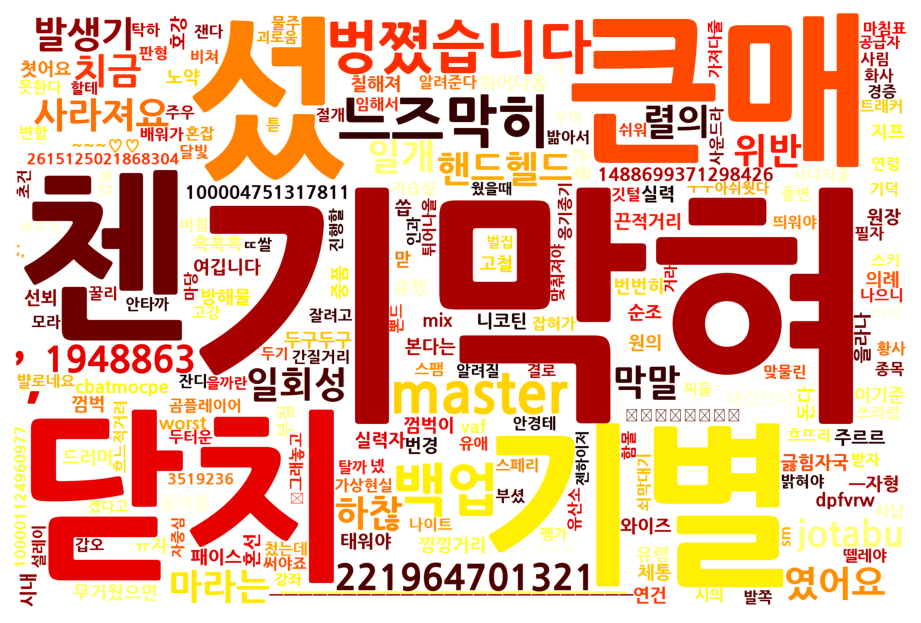

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()